In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(len(x_train), len(x_test))
print(x_train.shape, x_test.shape)

60000 10000
(60000, 28, 28) (10000, 28, 28)


In [ ]:
print(type(x_train), " ", type(y_train))

<class 'numpy.ndarray'>   <class 'numpy.ndarray'>


In [ ]:
print(y_train)

[9 0 0 ... 3 0 5]


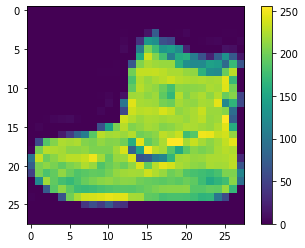

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

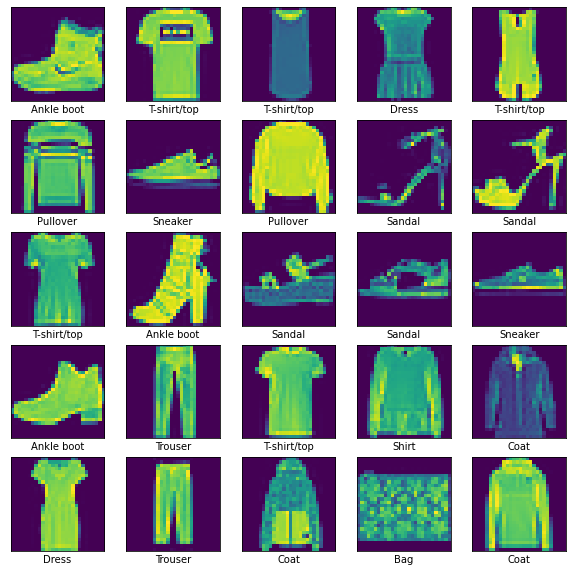

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])#, cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = keras.Sequential([    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7156 - accuracy: 0.7674 - val_loss: 0.5512 - val_accuracy: 0.8010
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4865 - accuracy: 0.8310 - val_loss: 0.4905 - val_accuracy: 0.8222
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8451 - val_loss: 0.4597 - val_accuracy: 0.8357
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8549 - val_loss: 0.4337 - val_accuracy: 0.8470
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8616 - val_loss: 0.4256 - val_accuracy: 0.8493
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8666 - val_loss: 0.4193 - val_accuracy: 0.8523
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8711 - val_loss: 0.3998 - val_ac

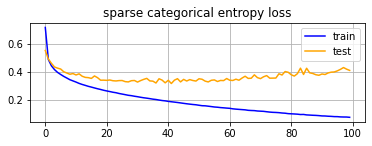

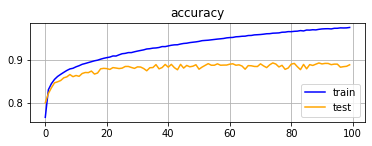

In [ ]:
plt.subplot(211)
plt.title('sparse categorical entropy loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(211)
plt.title('accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.grid(True)
plt.show()